In [ ]:
import numpy as np

def inverse_kinematics(x, z, l1, l2, l3):
    """
    Inverse kinematics for a 3DOF planar robot arm in X-Z plane (no z-offset).
    
    Parameters:
    x, z       : float - End-effector target position
    l1, l2, l3 : float - Lengths of the links

    Returns:
    theta1, theta2, theta3 : Joint angles (in radians)
    """

    # Compute φ as the angle from base to end-effector
    phi = np.arctan2(z, x)

    # Step 1: Compute wrist position
    x2 = x - l3 * np.cos(phi)
    z2 = z - l3 * np.sin(phi)

    # Step 2: Compute theta2 using cosine law
    D = (x2**2 + z2**2 - l1**2 - l2**2) / (2 * l1 * l2)
    if np.abs(D) > 1:
        raise ValueError("Target is out of reach")

    theta2 = np.arccos(D)

    # Step 3: Compute theta1
    k1 = l1 + l2 * np.cos(theta2)
    k2 = l2 * np.sin(theta2)
    theta1 = np.arctan2(z2, x2) - np.arctan2(k2, k1)

    # Step 4: Compute theta3
    theta3 = phi - (theta1 + theta2)

    return theta1, theta2, theta3


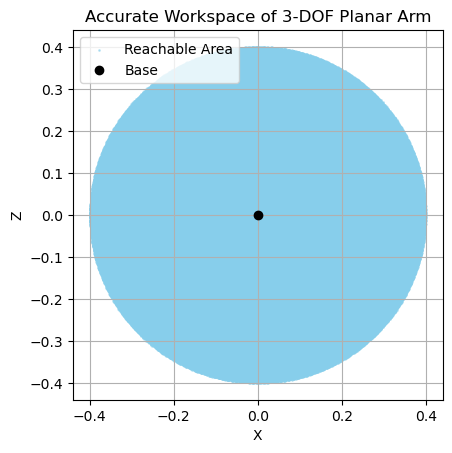

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def get_workspace_points(l1, l2, l3, resolution=100):
    """
    Generate reachable (x, z) points for a 3-DOF planar robot arm.

    Parameters:
    l1, l2, l3 : float - Link lengths
    resolution : int - Number of steps for each joint angle

    Returns:
    np.array of (x, z) reachable points
    """
    theta1_range = np.linspace(-np.pi, np.pi, resolution)
    theta2_range = np.linspace(-np.pi, np.pi, resolution)
    theta3_range = np.linspace(-np.pi, np.pi, resolution // 2)

    points = []
    for t1 in theta1_range:
        for t2 in theta2_range:
            for t3 in theta3_range:
                x1 = l1 * np.cos(t1)
                z1 = l1 * np.sin(t1)
                x2 = x1 + l2 * np.cos(t1 + t2)
                z2 = z1 + l2 * np.sin(t1 + t2)
                x3 = x2 + l3 * np.cos(t1 + t2 + t3)
                z3 = z2 + l3 * np.sin(t1 + t2 + t3)
                points.append((x3, z3))
    return np.array(points)

# Link lengths
l1, l2, l3 = 0.15, 0.15, 0.10

# Get reachable points
reachable_points = get_workspace_points(l1, l2, l3)

# Plotting
fig, ax = plt.subplots()
ax.scatter(reachable_points[:, 0], reachable_points[:, 1], s=1, color='skyblue', alpha=0.5, label='Reachable Area')
ax.plot(0, 0, 'ko', label='Base')

ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_title('Accurate Workspace of 3-DOF Planar Arm')
ax.legend()
plt.show()


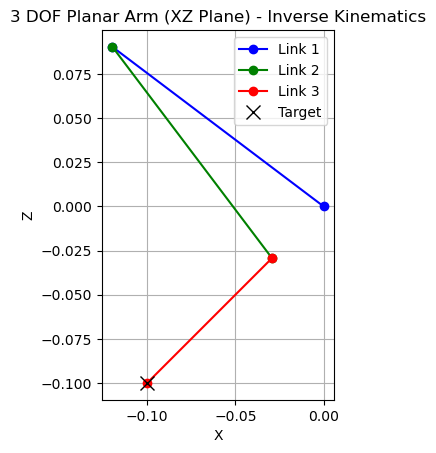

In [51]:
# Target end-effector position
x_target, z_target = -.1, -0.1

# Compute joint angles
theta1, theta2, theta3 = inverse_kinematics(x_target, z_target, l1, l2, l3)

# Forward kinematics to get joint positions
joint1 = (0, 0)
joint2 = (l1 * np.cos(theta1), l1 * np.sin(theta1))
joint3 = (joint2[0] + l2 * np.cos(theta1 + theta2), joint2[1] + l2 * np.sin(theta1 + theta2))
end_effector = (joint3[0] + l3 * np.cos(theta1 + theta2 + theta3), joint3[1] + l3 * np.sin(theta1 + theta2 + theta3))

# Plotting
fig, ax = plt.subplots()
ax.plot([joint1[0], joint2[0]], [joint1[1], joint2[1]], 'bo-', label='Link 1')
ax.plot([joint2[0], joint3[0]], [joint2[1], joint3[1]], 'go-', label='Link 2')
ax.plot([joint3[0], end_effector[0]], [joint3[1], end_effector[1]], 'ro-', label='Link 3')
ax.plot(x_target, z_target, 'kx', label='Target', markersize=10)

ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_title('3 DOF Planar Arm (XZ Plane) - Inverse Kinematics')
ax.legend()

plt.show()
